# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import tensorflow.keras as keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/Users/ttyoung/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
x_train = x_train[:5000]
x_test = x_test[:5000]
y_train = y_train[:5000]
y_test = y_test[:5000]

In [14]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 1e-1
NESTEROV = [False,True]
OPTIMIZER = ['SGD', 'RMSprop', 'AdaGrad', 'Adam']
# SGD
# RMSprop
# AdaGrad
# Adam

In [12]:
# keras.optimizers.
import itertools

In [27]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr, optimizer_type in list(itertools.product(LEARNING_RATE,OPTIMIZER)):
    try:
        keras.backend.clear_session() # 把舊的 Graph 清掉
    except:
        pass
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    if optimizer_type =='SGD':
        optimizer = keras.optimizers.SGD(lr=lr)
    elif optimizer_type == 'RMSprop':
        optimizer = keras.optimizers.RMSprop(lr=lr)
    elif optimizer_type == 'AdaGrad':
        optimizer = keras.optimizers.Adagrad(lr=lr)
    elif optimizer_type == 'Adam':
        optimizer = keras.optimizers.Adam(lr=lr)
        
        
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-{optimizer_type}-lr-{lr}".format(lr=lr, optimizer_type=optimizer_type)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 5000 samples, validate on 5000 samples
Epoch 1/50
5000/5000 [==============================] 

Train on 5000 samples, validate on 5000 samples
Epoch 1/50
5000/5000 [==============================] - 1s 248us/step - loss: 14.0195 - acc: 0.0918 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 2/50
5000/5000 [==============================] - 1s 178us/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 3/50
5000/5000 [==============================] - 1s 179us/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 4/50
5000/5000 [==============================] - 1s 177us/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 5/50
5000/5000 [==============================] - 1s 174us/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 6/50
5000/5000 [==============================] - 1s 178us/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 7/50
5000/5000 [==============================] - 1s 178us/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.4902 - va

Epoch 2/50
5000/5000 [==============================] - 1s 173us/step - loss: 14.5514 - acc: 0.0972 - val_loss: 14.5160 - val_acc: 0.0994
Epoch 3/50
5000/5000 [==============================] - 1s 173us/step - loss: 14.5514 - acc: 0.0972 - val_loss: 14.5160 - val_acc: 0.0994
Epoch 4/50
5000/5000 [==============================] - 1s 172us/step - loss: 14.5514 - acc: 0.0972 - val_loss: 14.5160 - val_acc: 0.0994
Epoch 5/50
5000/5000 [==============================] - 1s 179us/step - loss: 14.5514 - acc: 0.0972 - val_loss: 14.5160 - val_acc: 0.0994
Epoch 6/50
5000/5000 [==============================] - 1s 202us/step - loss: 14.5514 - acc: 0.0972 - val_loss: 14.5160 - val_acc: 0.0994
Epoch 7/50
5000/5000 [==============================] - 1s 176us/step - loss: 14.5514 - acc: 0.0972 - val_loss: 14.5160 - val_acc: 0.0994
Epoch 8/50
5000/5000 [==============================] - 1s 187us/step - loss: 14.5514 - acc: 0.0972 - val_loss: 14.5160 - val_acc: 0.0994
Epoch 9/50
5000/5000 [============

5000/5000 [==============================] - 1s 224us/step - loss: 14.4902 - acc: 0.1010 - val_loss: 14.5450 - val_acc: 0.0976
Epoch 4/50
5000/5000 [==============================] - 1s 202us/step - loss: 14.4902 - acc: 0.1010 - val_loss: 14.5450 - val_acc: 0.0976
Epoch 5/50
5000/5000 [==============================] - 1s 217us/step - loss: 14.4902 - acc: 0.1010 - val_loss: 14.5450 - val_acc: 0.0976
Epoch 6/50
5000/5000 [==============================] - 1s 192us/step - loss: 14.4902 - acc: 0.1010 - val_loss: 14.5450 - val_acc: 0.0976
Epoch 7/50
5000/5000 [==============================] - 1s 190us/step - loss: 14.4902 - acc: 0.1010 - val_loss: 14.5450 - val_acc: 0.0976
Epoch 8/50
5000/5000 [==============================] - 1s 186us/step - loss: 14.4902 - acc: 0.1010 - val_loss: 14.5450 - val_acc: 0.0976
Epoch 9/50
5000/5000 [==============================] - 1s 190us/step - loss: 14.4902 - acc: 0.1010 - val_loss: 14.5450 - val_acc: 0.0976
Epoch 10/50
5000/5000 [======================

5000/5000 [==============================] - 1s 161us/step - loss: 2.0911 - acc: 0.2630 - val_loss: 2.1035 - val_acc: 0.2352
Epoch 5/50
5000/5000 [==============================] - 1s 166us/step - loss: 2.0547 - acc: 0.2768 - val_loss: 2.0597 - val_acc: 0.2652
Epoch 6/50
5000/5000 [==============================] - 1s 173us/step - loss: 2.0203 - acc: 0.2964 - val_loss: 2.0381 - val_acc: 0.2580
Epoch 7/50
5000/5000 [==============================] - 1s 167us/step - loss: 1.9899 - acc: 0.2954 - val_loss: 2.0126 - val_acc: 0.2768
Epoch 8/50
5000/5000 [==============================] - 1s 162us/step - loss: 1.9673 - acc: 0.3084 - val_loss: 1.9916 - val_acc: 0.2948
Epoch 9/50
5000/5000 [==============================] - 1s 172us/step - loss: 1.9440 - acc: 0.3148 - val_loss: 1.9753 - val_acc: 0.2842
Epoch 10/50
5000/5000 [==============================] - 1s 164us/step - loss: 1.9239 - acc: 0.3176 - val_loss: 1.9669 - val_acc: 0.2980
Epoch 11/50
5000/5000 [==============================] - 1

5000/5000 [==============================] - 1s 191us/step - loss: 14.5514 - acc: 0.0972 - val_loss: 14.5160 - val_acc: 0.0994
Epoch 7/50
5000/5000 [==============================] - 1s 182us/step - loss: 14.5514 - acc: 0.0972 - val_loss: 14.5160 - val_acc: 0.0994
Epoch 8/50
5000/5000 [==============================] - 1s 182us/step - loss: 14.5514 - acc: 0.0972 - val_loss: 14.5160 - val_acc: 0.0994
Epoch 9/50
5000/5000 [==============================] - 1s 182us/step - loss: 14.5514 - acc: 0.0972 - val_loss: 14.5160 - val_acc: 0.0994
Epoch 10/50
5000/5000 [==============================] - 1s 195us/step - loss: 14.5514 - acc: 0.0972 - val_loss: 14.5160 - val_acc: 0.0994
Epoch 11/50
5000/5000 [==============================] - 1s 193us/step - loss: 14.5514 - acc: 0.0972 - val_loss: 14.5160 - val_acc: 0.0994
Epoch 12/50
5000/5000 [==============================] - 1s 184us/step - loss: 14.5514 - acc: 0.0972 - val_loss: 14.5160 - val_acc: 0.0994
Epoch 13/50
5000/5000 [===================

5000/5000 [==============================] - 1s 210us/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 8/50
5000/5000 [==============================] - 1s 188us/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 9/50
5000/5000 [==============================] - 1s 191us/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 10/50
5000/5000 [==============================] - 1s 179us/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 11/50
5000/5000 [==============================] - 1s 174us/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 12/50
5000/5000 [==============================] - 1s 177us/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 13/50
5000/5000 [==============================] - 1s 170us/step - loss: 14.6352 - acc: 0.0920 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 14/50
5000/5000 [==================

5000/5000 [==============================] - 1s 205us/step - loss: 14.4450 - acc: 0.1038 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 9/50
5000/5000 [==============================] - 1s 212us/step - loss: 14.4450 - acc: 0.1038 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 10/50
5000/5000 [==============================] - 1s 211us/step - loss: 14.4450 - acc: 0.1038 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 11/50
5000/5000 [==============================] - 1s 252us/step - loss: 14.4450 - acc: 0.1038 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 12/50
5000/5000 [==============================] - 2s 318us/step - loss: 14.4450 - acc: 0.1038 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 13/50
5000/5000 [==============================] - 2s 333us/step - loss: 14.4450 - acc: 0.1038 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 14/50
5000/5000 [==============================] - 2s 390us/step - loss: 14.4450 - acc: 0.1038 - val_loss: 14.4837 - val_acc: 0.1014
Epoch 15/50
5000/5000 [=================

In [28]:
import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())


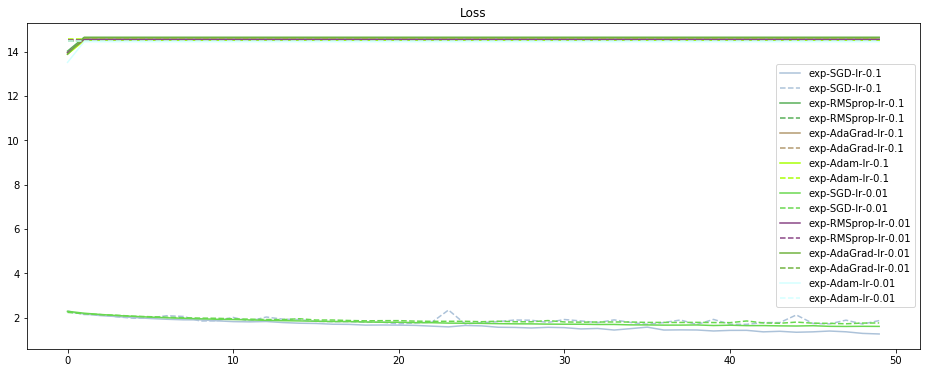

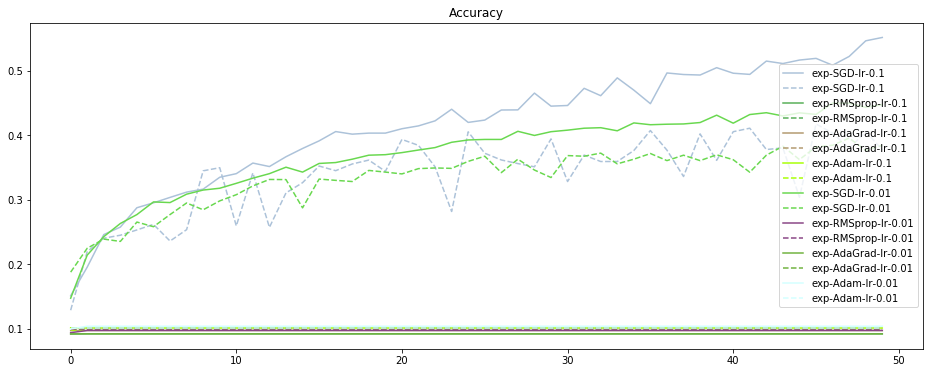

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = colors_list

plt.figure(figsize=(16,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()